In [ ]:
!python -m spacy download el_core_news_sm

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd
%matplotlib inline
import numpy as np
import glob
from sklearn.feature_extraction.text import CountVectorizer
from datetime import datetime
import spacy

In [4]:
filepath ='https://raw.githubusercontent.com/datajour-gr/DataJournalism/main/Bachelor%20Lessons%202023/Lesson%2010/NRC_GREEK_Translated_6_2020.csv'

In [5]:
emolex_df = pd.read_csv(filepath)
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
emolex_df = emolex_df.drop_duplicates(subset=['word'])
emolex_df = emolex_df.dropna()
emolex_df.reset_index(inplace = True, drop=True)

In [7]:
emolex_df.tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13156,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
13157,κροκος αυγου,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13158,νεοτερος,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13159,ζεφυρος,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13160,ζουμ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
nlp = spacy.load('el_core_news_sm')

In [10]:
news_beast_df=pd.read_csv('/news.csv')

In [11]:
len(news_beast_df)

200

In [12]:
news_beast_df.head(5)

,Title,Url,Article_content,Lead,Section,Datetime
0,Συνελήφθησαν στο Πακιστάν δέκα ύποπτοι για δια...,https://www.newsbeast.gr/world/arthro/9774408/...,"\nΤη σύλληψη δέκα ατόμων, που θεωρούνται ύποπτ...",Συνελήφθησαν στο Πακιστάν δέκα ύποπτοι για δια...,ΚΟΣΜΟΣ,18/06/2023 11:38
1,Ο γρίφος με τον άνδρα και την έξοδο,https://www.newsbeast.gr/weird/arthro/9772240/...,\nΟ πρωταγωνιστής του γρίφου που πρέπει να λύσ...,Ο γρίφος με τον άνδρα και την έξοδο,"Ο,ΤΙ ΝΑ 'ΝΑΙ",18/06/2023 11:33
2,Αποθέωση για τον ΛΕΞ από χιλιάδες θαυμαστές το...,https://www.newsbeast.gr/entertainment/arthro/...,\nΟ ΛΕΞ αφήνει το στίγμα του στην ελληνική μου...,Αποθέωση για τον ΛΕΞ από χιλιάδες θαυμαστές το...,ΔΙΑΣΚΕΔΑΣΗ,18/06/2023 11:23
3,Πυροβολισμοί στο Ιλινόις – Υπάρχουν αναφορές γ...,https://www.newsbeast.gr/world/arthro/9774372/...,"\nΣυναγερμός έχει σημάνει στο Ιλινόις, καθώς σ...",Πυροβολισμοί στο Ιλινόις – Υπάρχουν αναφορές γ...,ΚΟΣΜΟΣ,18/06/2023 11:13
4,Γιώργος Μουκίδης: Ωραίο παιδί ο Κωνσταντίνος Α...,https://www.newsbeast.gr/lifestyle/arthro/9774...,\nΓια τη σχέση του με τον Νότη Σφακιανάκη μίλη...,Γιώργος Μουκίδης: Ωραίο παιδί ο Κωνσταντίνος Α...,LIFESTYLE,18/06/2023 10:49


In [13]:
short_news_beast_df =news_beast_df[['Datetime','Article_content' ]]
short_news_beast_df = short_news_beast_df.rename(columns={'Full_text': 'Article_content'} )
short_news_beast_df.tail()

,Datetime,Article_content
195,16/06/2023 20:56,\nΗ Ελλάδα πήρε τη 2η νίκη της σε ισάριθμα παι...
196,16/06/2023 20:56,\nΟ πρόεδρος της Ουκρανίας Βολοντίμιρ Ζελένσκι...
197,16/06/2023 20:48,"\nΗ Έλενα Πολυχρονοπούλου, μετά την αθώωσή της..."
198,16/06/2023 20:44,\nΔεύτερος αγώνας για την Εθνική Ελλάδας στα π...
199,16/06/2023 20:42,\nΤο ΝΒΑ έθεσε σε αναστολή τον αστέρα των Μέμφ...


In [14]:
short_news_beast_df.dtypes

Datetime           object
Article_content    object
dtype: object

In [15]:
short_news_beast_df[short_news_beast_df['Datetime'].str.contains('Upd')]

,Datetime,Article_content
24,Upd: 18/06/2023 12:26,\nΓια όλα τα φλέγοντα ζητήματα τοποθετήθηκε ο ...
94,Upd: 17/06/2023 21:17,"\nΣτο νησί της Κω, έφτασε κλιμάκιο του τμήματο..."


In [16]:
short_news_beast_df['Datetime']=short_news_beast_df['Datetime'].str.replace('Upd: ', '')

In [17]:
short_news_beast_df['Datetime'] = pd.to_datetime(short_news_beast_df.Datetime , format='%d/%m/%Y %H:%M')

In [18]:
short_news_beast_df['year'] = pd.DatetimeIndex(short_news_beast_df['Datetime']).year
short_news_beast_df['month'] = pd.DatetimeIndex(short_news_beast_df['Datetime']).month
short_news_beast_df['day'] = pd.DatetimeIndex(short_news_beast_df['Datetime']).day
short_news_beast_df['hour'] = pd.DatetimeIndex(short_news_beast_df['Datetime']).hour
print(short_news_beast_df.info())
short_news_beast_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Datetime         200 non-null    datetime64[ns]
 1   Article_content  197 non-null    object        
 2   year             200 non-null    int64         
 3   month            200 non-null    int64         
 4   day              200 non-null    int64         
 5   hour             200 non-null    int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 9.5+ KB
None


,Datetime,Article_content,year,month,day,hour
0,2023-06-18 11:38:00,"\nΤη σύλληψη δέκα ατόμων, που θεωρούνται ύποπτ...",2023,6,18,11
1,2023-06-18 11:33:00,\nΟ πρωταγωνιστής του γρίφου που πρέπει να λύσ...,2023,6,18,11
2,2023-06-18 11:23:00,\nΟ ΛΕΞ αφήνει το στίγμα του στην ελληνική μου...,2023,6,18,11
3,2023-06-18 11:13:00,"\nΣυναγερμός έχει σημάνει στο Ιλινόις, καθώς σ...",2023,6,18,11
4,2023-06-18 10:49:00,\nΓια τη σχέση του με τον Νότη Σφακιανάκη μίλη...,2023,6,18,10


In [19]:
emolex_df['word'].head(3)

0              αφεση
1    ενορκη βεβαιωση
2            εχοντας
Name: word, dtype: object

In [20]:
vec = CountVectorizer(analyzer = 'word', vocabulary = emolex_df.word,
                      lowercase=False,
                      strip_accents = 'unicode',
                      stop_words= list(nlp.Defaults.stop_words),
                      ngram_range=(1, 2))

In [21]:
short_news_beast_df.isna().sum()

Datetime           0
Article_content    3
year               0
month              0
day                0
hour               0
dtype: int64

In [22]:
 short_news_beast_df.dropna(axis=0, subset=['Article_content'],
inplace=True)

In [23]:
matrix = vec.fit_transform(short_news_beast_df['Article_content'])
vocab = vec.get_feature_names_out()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['αδιακοπα', 'ακομα', 'ακομη', 'ακριβως', 'αλλα', 'αλλαχου', 'αλλες', 'αλλη', 'αλλην', 'αλλης', 'αλλιως', 'αλλιωτικα', 'αλλο', 'αλλοι', 'αλλοιως', 'αλλοιωτικα', 'αλλον', 'αλλος', 'αλλοτε', 'αλλου', 'αλλους', 'αλλων', 'αμα', 'αμεσα', 'αμεσως', 'ανα', 'αναμεσα', 'αναμεταξυ', 'ανευ', 'αντι', 'αντιπερα', 'αντις', 'ανω', 'ανωτερω', 'αξαφνα', 'απεναντι', 'απο', 'αποψε', 'αρα', 'αραγε', 'αρκετα', 'αρκετες', 'αρχικα', 'αυριο', 'αυτα', 'αυτες', 'αυτη', 'αυτην', 'αυτης', 'αυτο', 'αυτοι', 'αυτον', 'αυτος', 'αυτου', 'αυτους', 'αυτων', 'αφοτου', 'αφου', 'βεβαια', 'βεβαιοτατα', 'γιατι', 'γρηγορα', 'γυρω', 'δεινα', 'δεξια', 'δηθεν', 'δηλαδη', 'διαρκως', 'δικα', 'δικο', 'δικοι', 'δικος', 'δικου', 'δικους', 'διολου', 'διπλα', 'διχως', 'εαν', 'εαυτο', 'εαυτον', 'εαυτου', 'εαυτους', 'εαυτων', 'εγιναν', 'εγινε',

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
wordcount_df.shape

(197, 13161)

In [25]:
emolex_df.head()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,αφεση,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ενορκη βεβαιωση,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,εχοντας,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,εχω,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,οριο,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
emolex_df[emolex_df.Anger == 1].tail()

,word,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
13094,διεξοδος,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13096,ζωυφια,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
13100,θυματοποιω,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
13128,αποτυχημενος,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13156,ουρλιασμα,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [27]:
positive_words = emolex_df[emolex_df.Positive == 1]['word']

negative_words = emolex_df[emolex_df.Negative == 1]['word']

angry_words = emolex_df[emolex_df.Anger == 1]['word']

anticipation_words = emolex_df[emolex_df.Anticipation == 1]['word']

disgust_words = emolex_df[emolex_df.Disgust == 1]['word']

fear_words = emolex_df[emolex_df.Fear == 1]['word']

joy_words = emolex_df[emolex_df.Joy == 1]['word']

sadness_words = emolex_df[emolex_df.Sadness == 1]['word']

surprise_words = emolex_df[emolex_df.Surprise == 1]['word']

trust_words = emolex_df[emolex_df.Trust == 1]['word']

In [28]:
trust_words

8                        αμην
15             γαμηλιο ταξιδι
24       διευθυντρια σχολειου
38                 επικοινωνω
45                   εκκλησια
                 ...         
13039                  αληθης
13075             αναμφιβολως
13079             ανυπερβατος
13113            αναθηματικος
13114       αποδειξη πληρωμης
Name: word, Length: 1259, dtype: object

In [29]:
wordcount_df.tail(1)

,αφεση,ενορκη βεβαιωση,εχοντας,εχω,οριο,ορμος,υδρα,αγια τραπεζα,αμην,απατσι,...,κλητηριο ενταλμα,κατειργασμενος,μαγια,κιτρινο,κιτρινιζω,ουρλιασμα,κροκος αυγου,νεοτερος,ζεφυρος,ζουμ
196,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
wordcount_df[trust_words].tail(1)

,αμην,γαμηλιο ταξιδι,διευθυντρια σχολειου,επικοινωνω,εκκλησια,εν τω μεταξυ,ευαγγελιο,κυριε,λιστα ελεγχου,λυρικη σκηνη,...,ηλιακο ωρολογιο,συνεργιστικος,διπλο ποδηλατο,ισαξιος,ανακωχη,αληθης,αναμφιβολως,ανυπερβατος,αναθηματικος,αποδειξη πληρωμης
196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
wordcount_df[trust_words].sum(axis=1)

0       7
1       1
2       0
3       4
4       5
       ..
192     4
193     1
194     6
195    11
196     6
Length: 197, dtype: int64

In [32]:
surprise_words

15             γαμηλιο ταξιδι
69               λυρικη σκηνη
149          τυχερα παιχνιδια
156                  φεστιβαλ
177                   αγγελος
                 ...         
13080               ανυποπτος
13088                 εκλειπω
13100              θυματοποιω
13144    ανεξελεγκτη πυρκαγια
13156               ουρλιασμα
Name: word, Length: 595, dtype: object

In [33]:
wordcount_df[surprise_words].sum(axis=1)

0      3
1      3
2      3
3      2
4      4
      ..
192    1
193    1
194    2
195    7
196    4
Length: 197, dtype: int64

In [34]:
short_news_beast_df.head(3)

,Datetime,Article_content,year,month,day,hour
0,2023-06-18 11:38:00,"\nΤη σύλληψη δέκα ατόμων, που θεωρούνται ύποπτ...",2023,6,18,11
1,2023-06-18 11:33:00,\nΟ πρωταγωνιστής του γρίφου που πρέπει να λύσ...,2023,6,18,11
2,2023-06-18 11:23:00,\nΟ ΛΕΞ αφήνει το στίγμα του στην ελληνική μου...,2023,6,18,11


In [35]:
short_news_beast_df['anger'] = wordcount_df[angry_words].sum(axis=1)

short_news_beast_df['positive'] = wordcount_df[positive_words].sum(axis=1)

short_news_beast_df['joy'] = wordcount_df[joy_words].sum(axis=1)

short_news_beast_df['disgust'] = wordcount_df[disgust_words].sum(axis=1)

short_news_beast_df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

short_news_beast_df['trust'] = wordcount_df[trust_words].sum(axis=1)

short_news_beast_df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)

short_news_beast_df['sadness'] = wordcount_df[sadness_words].sum(axis=1)
short_news_beast_df['negative'] = wordcount_df[negative_words].sum(axis=1)
short_news_beast_df['fear'] = wordcount_df[fear_words].sum(axis=1)

In [36]:
short_news_beast_df

,Datetime,Article_content,year,month,day,hour,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
0,2023-06-18 11:38:00,"\nΤη σύλληψη δέκα ατόμων, που θεωρούνται ύποπτ...",2023,6,18,11,4.0,5.0,2.0,4.0,3.0,7.0,3.0,5.0,10.0,4.0
1,2023-06-18 11:33:00,\nΟ πρωταγωνιστής του γρίφου που πρέπει να λύσ...,2023,6,18,11,2.0,1.0,1.0,3.0,3.0,1.0,1.0,1.0,3.0,2.0
2,2023-06-18 11:23:00,\nΟ ΛΕΞ αφήνει το στίγμα του στην ελληνική μου...,2023,6,18,11,1.0,1.0,1.0,1.0,3.0,0.0,0.0,2.0,1.0,2.0
3,2023-06-18 11:13:00,"\nΣυναγερμός έχει σημάνει στο Ιλινόις, καθώς σ...",2023,6,18,11,1.0,7.0,2.0,1.0,2.0,4.0,4.0,2.0,1.0,2.0
4,2023-06-18 10:49:00,\nΓια τη σχέση του με τον Νότη Σφακιανάκη μίλη...,2023,6,18,10,5.0,16.0,5.0,12.0,4.0,5.0,8.0,5.0,11.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2023-06-16 20:56:00,\nΗ Ελλάδα πήρε τη 2η νίκη της σε ισάριθμα παι...,2023,6,16,20,6.0,18.0,6.0,6.0,7.0,11.0,13.0,5.0,8.0,6.0
196,2023-06-16 20:56:00,\nΟ πρόεδρος της Ουκρανίας Βολοντίμιρ Ζελένσκι...,2023,6,16,20,9.0,21.0,5.0,8.0,4.0,6.0,10.0,6.0,14.0,7.0
197,2023-06-16 20:48:00,"\nΗ Έλενα Πολυχρονοπούλου, μετά την αθώωσή της...",2023,6,16,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
198,2023-06-16 20:44:00,\nΔεύτερος αγώνας για την Εθνική Ελλάδας στα π...,2023,6,16,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
short_news_beast_df.reset_index(inplace=True)
short_news_beast_df.set_index('Datetime', inplace=True)
short_news_beast_df

,index,Article_content,year,month,day,hour,anger,positive,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
Datetime,,,,,,,,,,,,,,,,
2023-06-18 11:38:00,0,"\nΤη σύλληψη δέκα ατόμων, που θεωρούνται ύποπτ...",2023,6,18,11,4.0,5.0,2.0,4.0,3.0,7.0,3.0,5.0,10.0,4.0
2023-06-18 11:33:00,1,\nΟ πρωταγωνιστής του γρίφου που πρέπει να λύσ...,2023,6,18,11,2.0,1.0,1.0,3.0,3.0,1.0,1.0,1.0,3.0,2.0
2023-06-18 11:23:00,2,\nΟ ΛΕΞ αφήνει το στίγμα του στην ελληνική μου...,2023,6,18,11,1.0,1.0,1.0,1.0,3.0,0.0,0.0,2.0,1.0,2.0
2023-06-18 11:13:00,3,"\nΣυναγερμός έχει σημάνει στο Ιλινόις, καθώς σ...",2023,6,18,11,1.0,7.0,2.0,1.0,2.0,4.0,4.0,2.0,1.0,2.0
2023-06-18 10:49:00,4,\nΓια τη σχέση του με τον Νότη Σφακιανάκη μίλη...,2023,6,18,10,5.0,16.0,5.0,12.0,4.0,5.0,8.0,5.0,11.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-16 20:56:00,195,\nΗ Ελλάδα πήρε τη 2η νίκη της σε ισάριθμα παι...,2023,6,16,20,6.0,18.0,6.0,6.0,7.0,11.0,13.0,5.0,8.0,6.0
2023-06-16 20:56:00,196,\nΟ πρόεδρος της Ουκρανίας Βολοντίμιρ Ζελένσκι...,2023,6,16,20,9.0,21.0,5.0,8.0,4.0,6.0,10.0,6.0,14.0,7.0
2023-06-16 20:48:00,197,"\nΗ Έλενα Πολυχρονοπούλου, μετά την αθώωσή της...",2023,6,16,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='Datetime'>

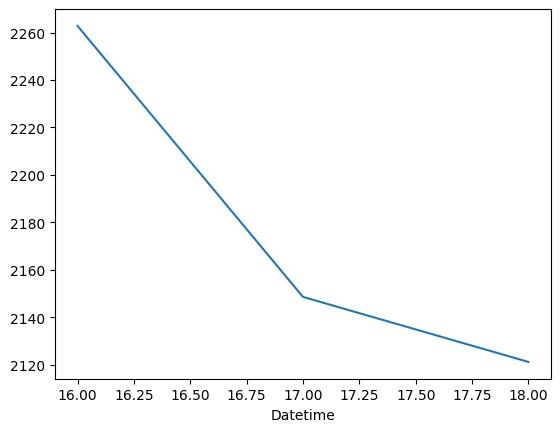

In [38]:
short_news_beast_df['Article_content'].str.len().groupby(by=short_news_beast_df.index.day).mean().plot()

<Axes: xlabel='Datetime'>

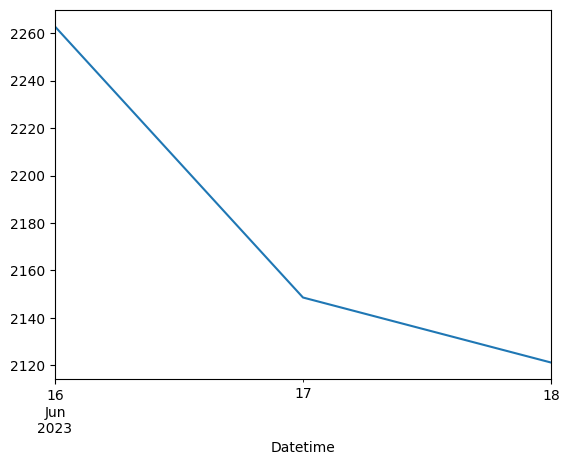

In [39]:
short_news_beast_df['Article_content'].str.len().resample('D').mean().plot()

<Axes: ylabel='Datetime'>

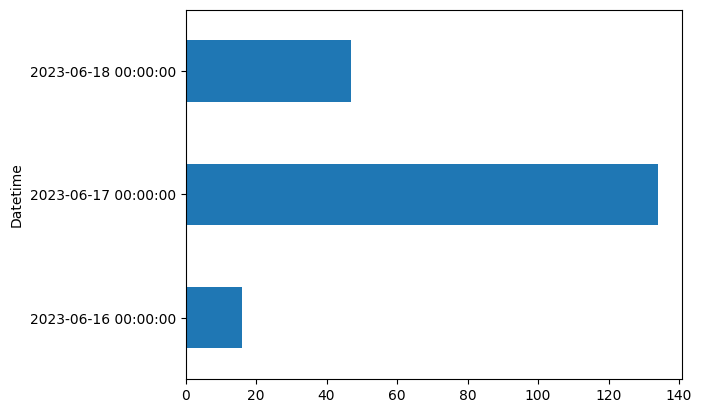

In [42]:
short_news_beast_df['Article_content'].resample('D').count().plot(kind='barh')

<Axes: xlabel='Datetime'>

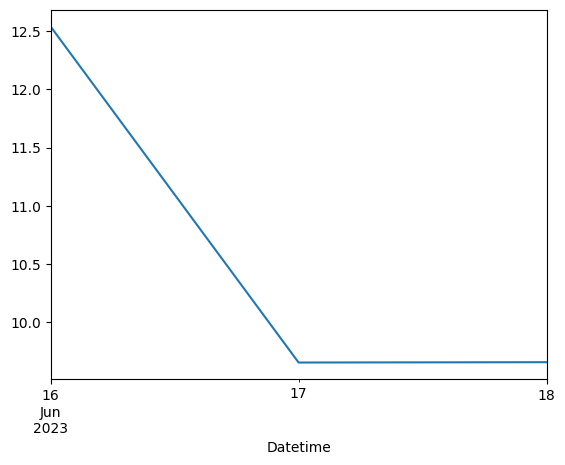

In [43]:
short_news_beast_df['positive'].resample('D').mean().plot()

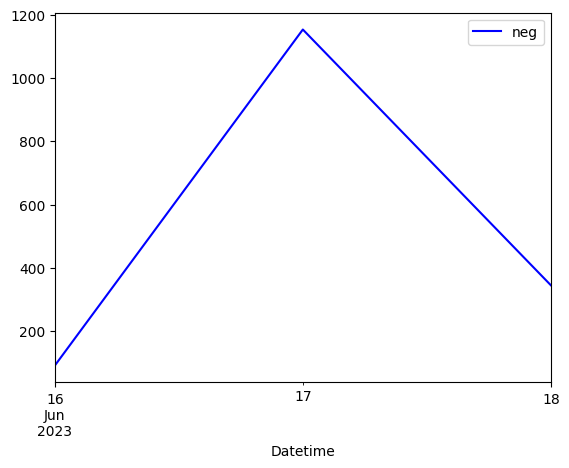

In [44]:
short_news_beast_df['negative'].resample('D').sum().plot(color = 'b',label = 'neg').legend()

<Axes: xlabel='Datetime'>

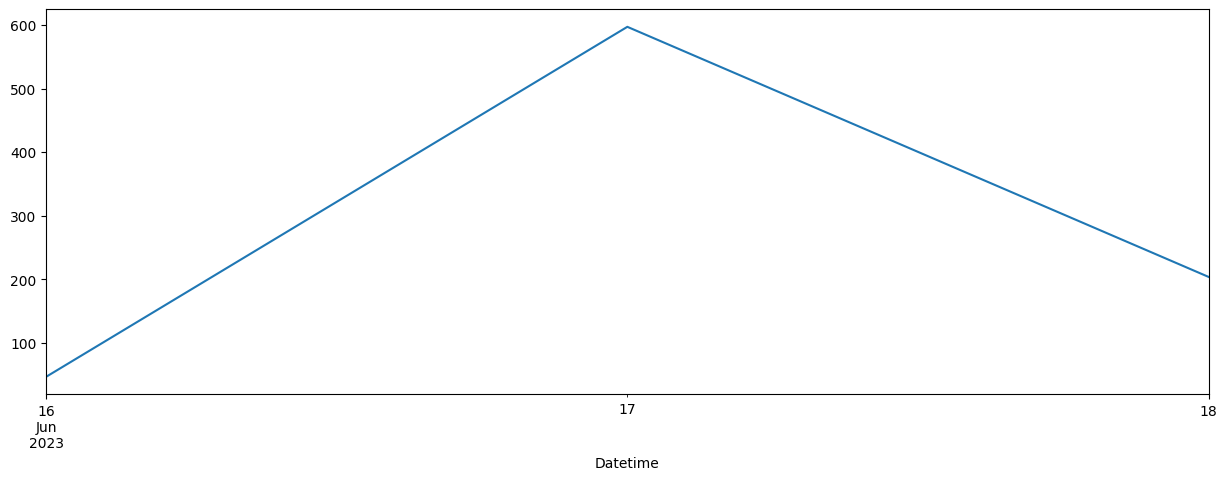

In [49]:
short_news_beast_df['anger'].resample('D').sum().plot(figsize=(15,5))

<Axes: xlabel='Datetime'>

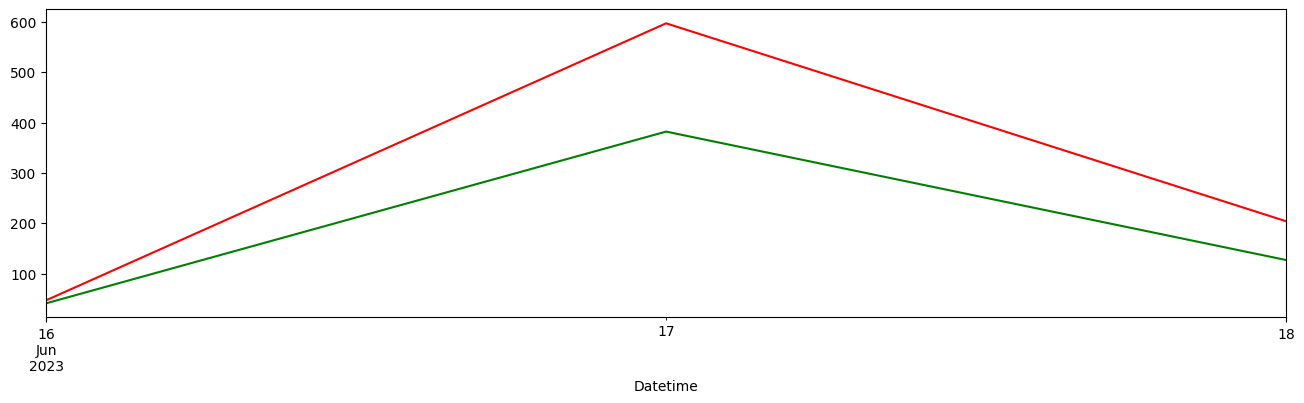

In [50]:
ax = short_news_beast_df['anger'].resample('D').sum().plot(figsize=(16,4), color = 'red')
short_news_beast_df['joy'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'green')

<Axes: xlabel='Datetime'>

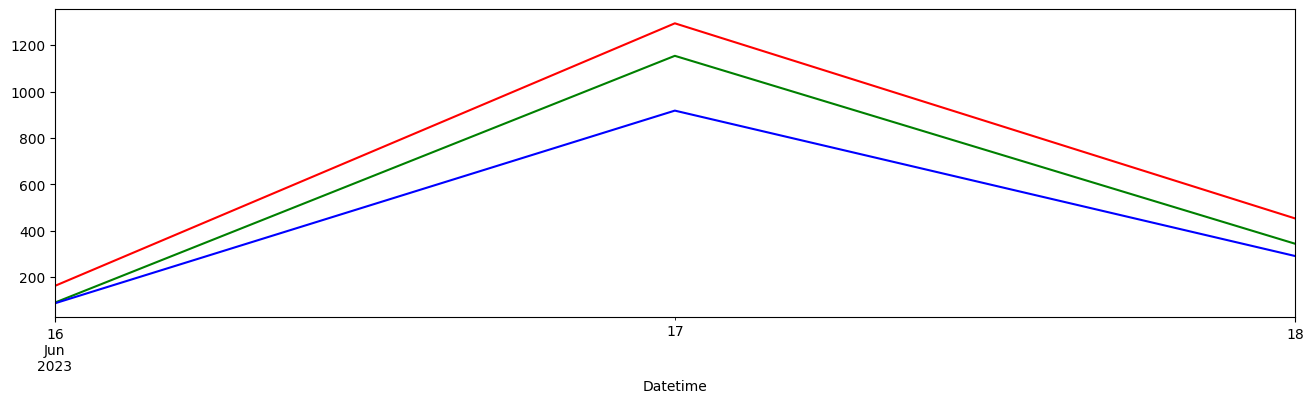

In [51]:
ax = short_news_beast_df['positive'].resample('D').sum().plot(figsize=(16,4), color = 'red')
short_news_beast_df['negative'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'green')
short_news_beast_df['trust'].resample('D').sum().plot(figsize=(16,4), ax = ax, color = 'blue')

In [52]:
import matplotlib.pyplot as plt
plt.style.use('default')

In [53]:
plt.style.use('grayscale')
plt.style.use('seaborn-v0_8-darkgrid')

<Axes: xlabel='Datetime'>

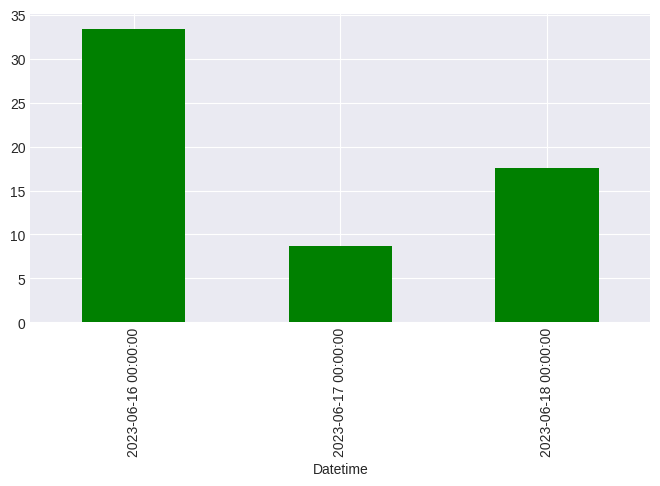

In [54]:
short_news_beast_df['(-)αρνητικότητα | θετικότητα(+)'] = short_news_beast_df.positive*100//short_news_beast_df[['positive','negative']].sum(
        axis=1) - short_news_beast_df.negative*100//short_news_beast_df[['positive','negative']].sum(axis=1)

short_news_beast_df['(-)αρνητικότητα | θετικότητα(+)'].resample('D').mean().plot(kind='bar',
                                                                               color=(short_news_beast_df['(-)αρνητικότητα | θετικότητα(+)'].resample('D').mean()>0
                                                                               ).map({True: 'g', False: 'r'}), figsize=(8,4))

In [55]:
short_news_beast_df[(short_news_beast_df['(-)αρνητικότητα | θετικότητα(+)'] == short_news_beast_df['(-)αρνητικότητα | θετικότητα(+)'].max()) |
                  (short_news_beast_df['(-)αρνητικότητα | θετικότητα(+)'] == short_news_beast_df['(-)αρνητικότητα | θετικότητα(+)'].min())
                  ][['index', 'positive', 'negative', '(-)αρνητικότητα | θετικότητα(+)']]

,index,positive,negative,(-)αρνητικότητα | θετικότητα(+)
Datetime,,,,
2023-06-18 04:34:00,42,8.0,0.0,100.0
2023-06-18 04:14:00,44,2.0,0.0,100.0
2023-06-18 03:28:00,49,4.0,0.0,100.0
2023-06-17 22:04:00,53,2.0,0.0,100.0
2023-06-17 21:28:00,57,2.0,0.0,100.0
2023-06-17 18:27:00,81,9.0,0.0,100.0
2023-06-17 18:07:00,84,5.0,0.0,100.0
2023-06-17 13:10:00,103,0.0,1.0,-100.0
2023-06-17 12:12:00,109,1.0,0.0,100.0
